In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.stattools import adfuller
from tqts.quantizer.paa import PAA
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
DATA_DIR = "../data/"
IMG_DIR = "../images/"

### Non-Stationary

In [3]:
etth1 = pd.read_csv(DATA_DIR + 'weather/weather.csv', index_col=0)

In [4]:
etth1.head()

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),...,wv (m/s),max. wv (m/s),wd (deg),rain (mm),raining (s),SWDR (W/m�),PAR (�mol/m�/s),max. PAR (�mol/m�/s),Tlog (degC),OT
date,,,,,,,,,,,,,,,,,,,,,
2020-01-01 00:10:00,1008.89,0.71,273.18,-1.33,86.1,6.43,5.54,0.89,3.42,5.49,...,1.02,1.60,224.3,0.0,0.0,0.0,0.0,0.0,11.45,428.1
2020-01-01 00:20:00,1008.76,0.75,273.22,-1.44,85.2,6.45,5.49,0.95,3.39,5.45,...,0.43,0.84,206.8,0.0,0.0,0.0,0.0,0.0,11.51,428.0
2020-01-01 00:30:00,1008.66,0.73,273.21,-1.48,85.1,6.44,5.48,0.96,3.39,5.43,...,0.61,1.48,197.1,0.0,0.0,0.0,0.0,0.0,11.60,427.6
2020-01-01 00:40:00,1008.64,0.37,272.86,-1.64,86.3,6.27,5.41,0.86,3.35,5.37,...,1.11,1.48,206.4,0.0,0.0,0.0,0.0,0.0,11.70,430.0
2020-01-01 00:50:00,1008.61,0.33,272.82,-1.50,87.4,6.26,5.47,0.79,3.38,5.42,...,0.49,1.40,209.6,0.0,0.0,0.0,0.0,0.0,11.81,432.2


In [5]:
etth1.shape

(52696, 21)

In [29]:
etth1.loc[etth1['OT'] < 350] = etth1['OT'].mean()

<Axes: xlabel='date'>

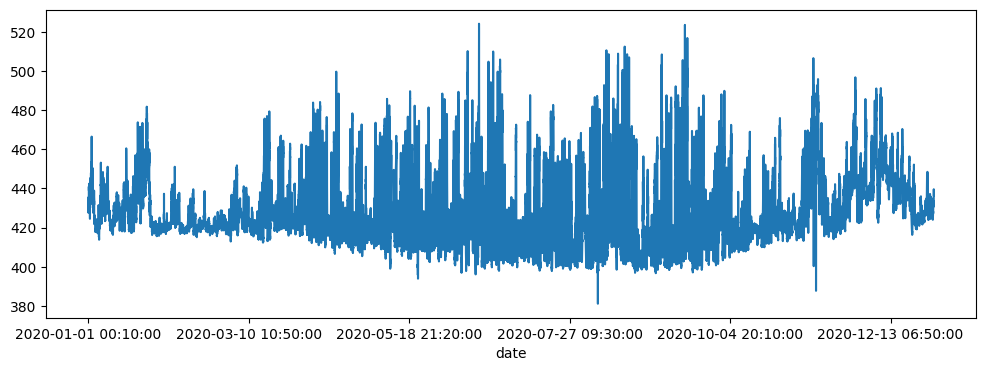

In [35]:
plt.figure(figsize=(12,4))
etth1['OT'].plot()

In [36]:
scaler = MinMaxScaler()
timeseries = etth1['OT']
scaled_etth1 = scaler.fit_transform(timeseries.values.reshape(-1, 1))

<Axes: xlabel='date'>

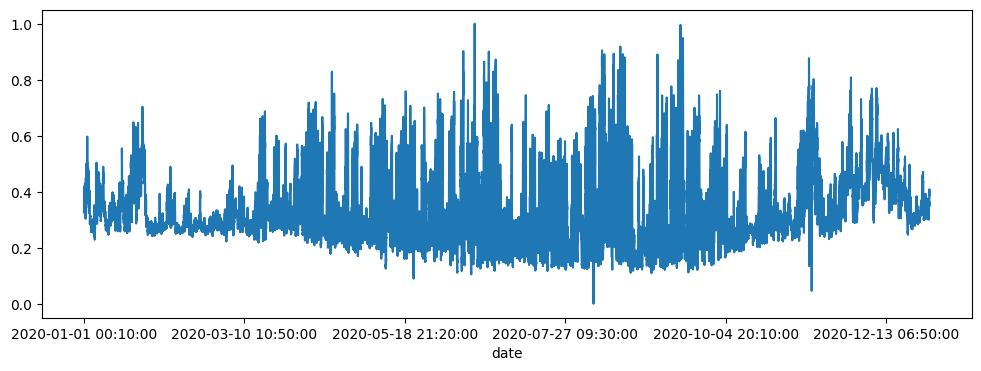

In [37]:
scaled_etth1 = pd.Series(scaled_etth1.flatten(), index=timeseries.index)
plt.figure(figsize=(12,4))
scaled_etth1.plot()

In [38]:
from tqts.quantizer.kernel_sax import KernelSAX

Epoch 1, Boundaries delta: 0.5017851564, Codewords delta: 0.1825667597
Epoch 2, Boundaries delta: 0.0727202580, Codewords delta: 0.0490585607
Epoch 3, Boundaries delta: 0.0457853786, Codewords delta: 0.0345005189
Epoch 4, Boundaries delta: 0.0315255405, Codewords delta: 0.0256337735
Epoch 5, Boundaries delta: 0.0232548708, Codewords delta: 0.0197559329
Epoch 6, Boundaries delta: 0.0176794653, Codewords delta: 0.0155827386
Epoch 7, Boundaries delta: 0.0138225850, Codewords delta: 0.0124015205
Epoch 8, Boundaries delta: 0.0109839240, Codewords delta: 0.0098943033
Epoch 9, Boundaries delta: 0.0088863591, Codewords delta: 0.0080190903
Epoch 10, Boundaries delta: 0.0072509205, Codewords delta: 0.0066903980
Epoch 11, Boundaries delta: 0.0061863484, Codewords delta: 0.0057372873
Epoch 12, Boundaries delta: 0.0055031618, Codewords delta: 0.0050472736
Epoch 13, Boundaries delta: 0.0049358930, Codewords delta: 0.0045195649
Epoch 14, Boundaries delta: 0.0044577695, Codewords delta: 0.0041428594
E

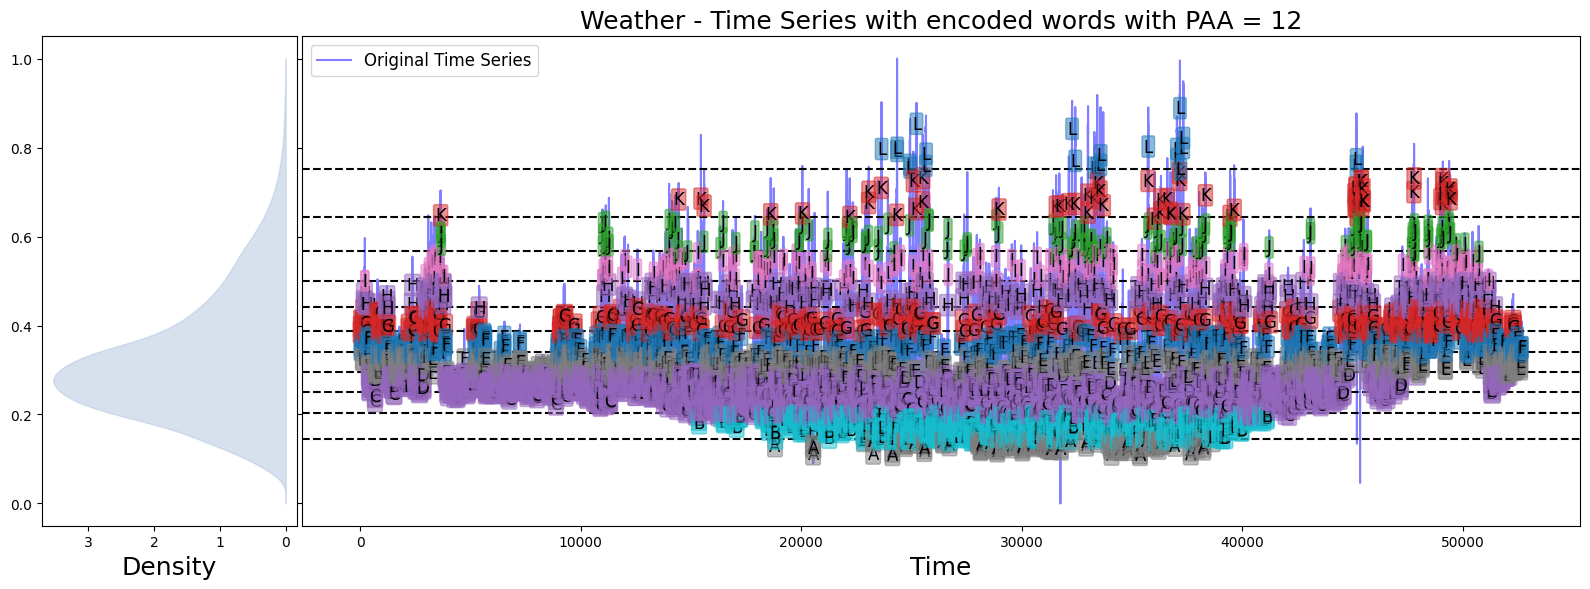

In [34]:
kernel_sax = KernelSAX(kernel='epanechnikov', n_alphabet=12, bandwidth=0.1, epochs=70, paa_window_size=12)
kernel_sax.fit(scaled_etth1.values, verbose=True)
kernel_sax.plot_with_boundaries(path=IMG_DIR, filename="weather/weather_ksax.png", data_name='Weather')
kernel_sax.text_to_df(start_datetime=str(etth1.index[0]), csv_path=DATA_DIR+"weather/weather_ksax.csv")

### Stationary

In [39]:
target = etth1['OT']
target = target.diff().dropna()

In [40]:
target.head()

date
2020-01-01 00:20:00   -0.1
2020-01-01 00:30:00   -0.4
2020-01-01 00:40:00    2.4
2020-01-01 00:50:00    2.2
2020-01-01 01:00:00   -1.7
Name: OT, dtype: float64

<Axes: xlabel='date'>

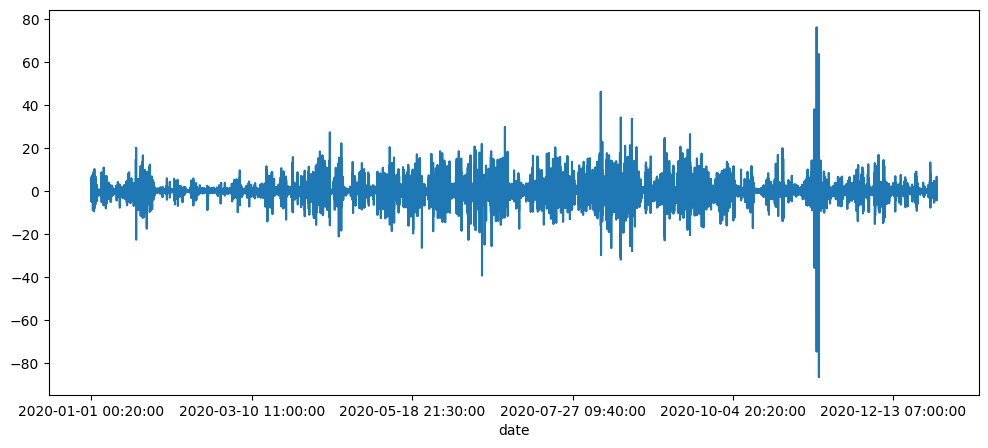

In [41]:
plt.figure(figsize=(12,5))
target.plot()

Epoch 1, Boundaries delta: 31.5090878033, Codewords delta: 39.6194678548
Epoch 2, Boundaries delta: 19.4253169327, Codewords delta: 5.9063431556
Epoch 3, Boundaries delta: 4.7609021790, Codewords delta: 2.3528999519
Epoch 4, Boundaries delta: 2.5045331986, Codewords delta: 1.4261742610
Epoch 5, Boundaries delta: 1.5308225867, Codewords delta: 0.9719617600
Epoch 6, Boundaries delta: 1.0206785762, Codewords delta: 0.7525641379
Epoch 7, Boundaries delta: 0.7448937444, Codewords delta: 0.5979067616
Epoch 8, Boundaries delta: 0.5612443602, Codewords delta: 0.4873209452
Epoch 9, Boundaries delta: 0.4456227526, Codewords delta: 0.4082701740
Epoch 10, Boundaries delta: 0.3613765334, Codewords delta: 0.3519961490
Epoch 11, Boundaries delta: 0.3020479639, Codewords delta: 0.3286899469
Epoch 12, Boundaries delta: 0.2674214857, Codewords delta: 0.2855250140
Epoch 13, Boundaries delta: 0.2300834376, Codewords delta: 0.2552288042
Epoch 14, Boundaries delta: 0.2054767446, Codewords delta: 0.251842131

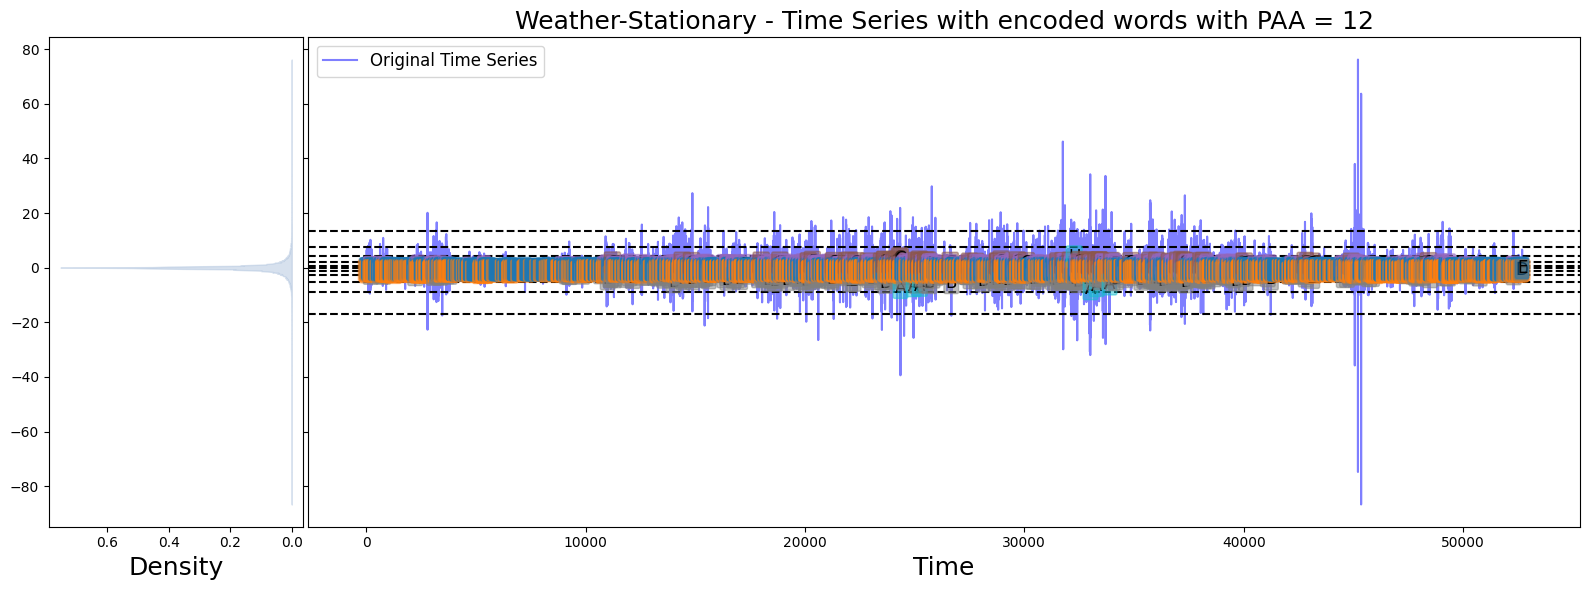

In [42]:
kernel_sax = KernelSAX(kernel='epanechnikov', n_alphabet=12, bandwidth=0.1, epochs=70, paa_window_size=12)
kernel_sax.fit(target.values, verbose=True)
kernel_sax.plot_with_boundaries(path=IMG_DIR, filename="weather/weather_stationary_ksax.png", data_name='Weather-Stationary')
kernel_sax.text_to_df(start_datetime=str(etth1.index[0]), csv_path=DATA_DIR+"weather/weather_stationary_ksax.csv")